In [5]:
from transformers import BlipProcessor, BlipForConditionalGeneration
import torch
from PIL import Image
import matplotlib.pyplot as plt
import os

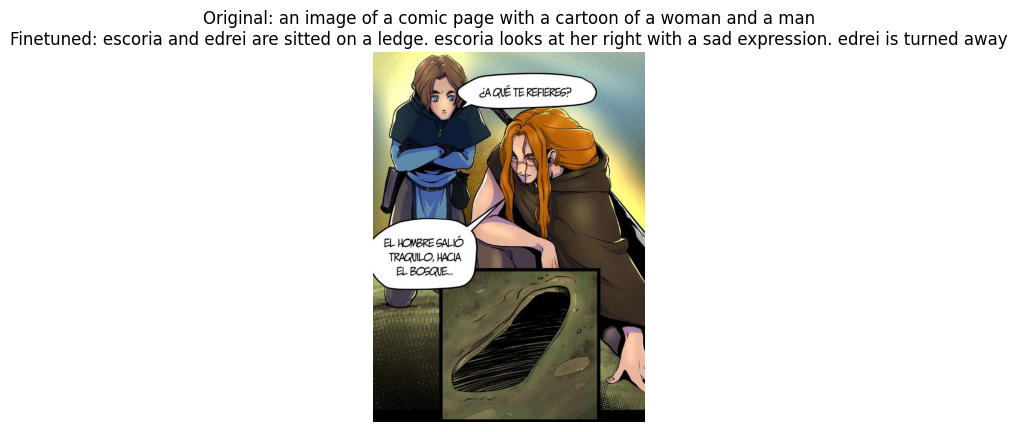

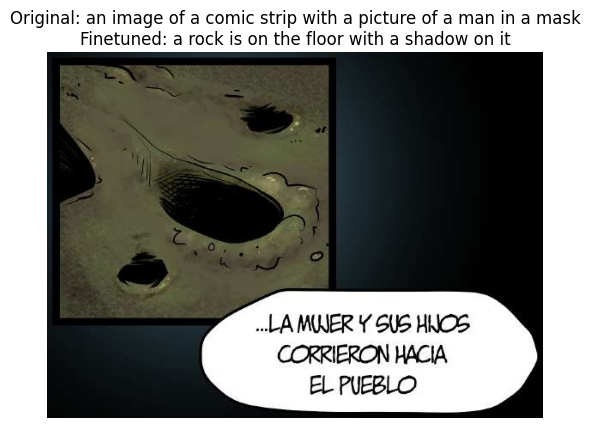

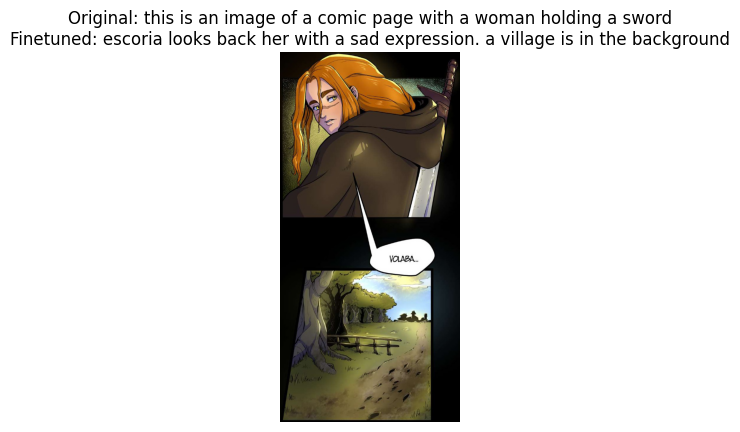

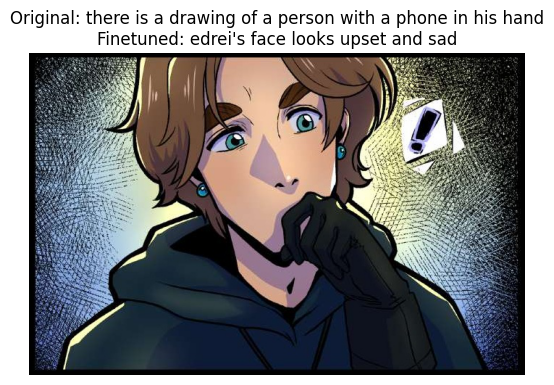

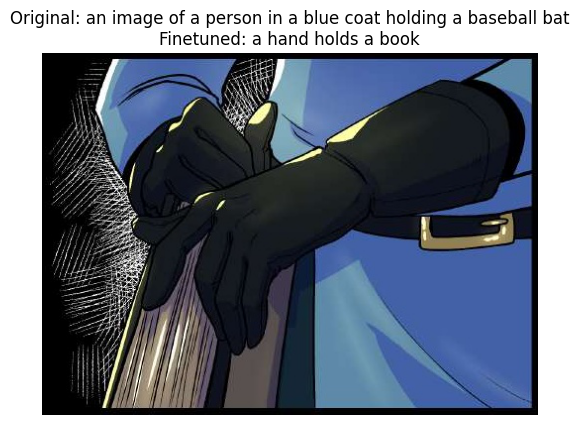

In [6]:
# Configurar el dispositivo (GPU o CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Cargar el modelo afinado y moverlo al dispositivo
finetuned_model = BlipForConditionalGeneration.from_pretrained(r"../../train/results").to(device)
finetuned_processor = BlipProcessor.from_pretrained(r"../../train/results")

# Cargar el procesador y el modelo
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-large")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-large").to(device)


# Obtener la lista de nombres de archivo en el directorio de imágenes de test
image_dir = r'../../data/output/divide_images_test/Chapter01/page2_img'
image_files = os.listdir(image_dir)

# Función para cargar y preprocesar una imagen
def load_and_preprocess_image(image_path):
    image = Image.open(image_path).convert("RGB")
    inputs = processor(images=image, return_tensors="pt")
    return inputs, image

# Bucle para describir cada imagen en el directorio usando ambos modelos
for image_file in image_files:
    # Construir la ruta completa de la imagen
    image_path = os.path.join(image_dir, image_file)
    
    # Procesar la imagen
    inputs, image = load_and_preprocess_image(image_path)
    
    # Mover los datos al dispositivo
    inputs = {key: tensor.to(device) for key, tensor in inputs.items()}
    
    # Generar descripción con el modelo original
    original_outputs = model.generate(
        **inputs,
        max_length=100,
        num_beams=5,
        length_penalty=2.0,
        early_stopping=True
    )
    original_caption = processor.decode(original_outputs[0], skip_special_tokens=True)
    
    # Generar descripción con el modelo afinado
    finetuned_outputs = finetuned_model.generate(
        **inputs,
        max_length=100,
        num_beams=5,
        length_penalty=2.0,
        early_stopping=True
    )
    finetuned_caption = finetuned_processor.decode(finetuned_outputs[0], skip_special_tokens=True)
    
    # Imprimir las descripciones y mostrar la imagen
    plt.imshow(image)
    plt.title(f"Original: {original_caption}\nFinetuned: {finetuned_caption}")
    plt.axis('off')
    plt.show()